Pre-sampling summary statistics

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
import shutil
import seaborn as sns


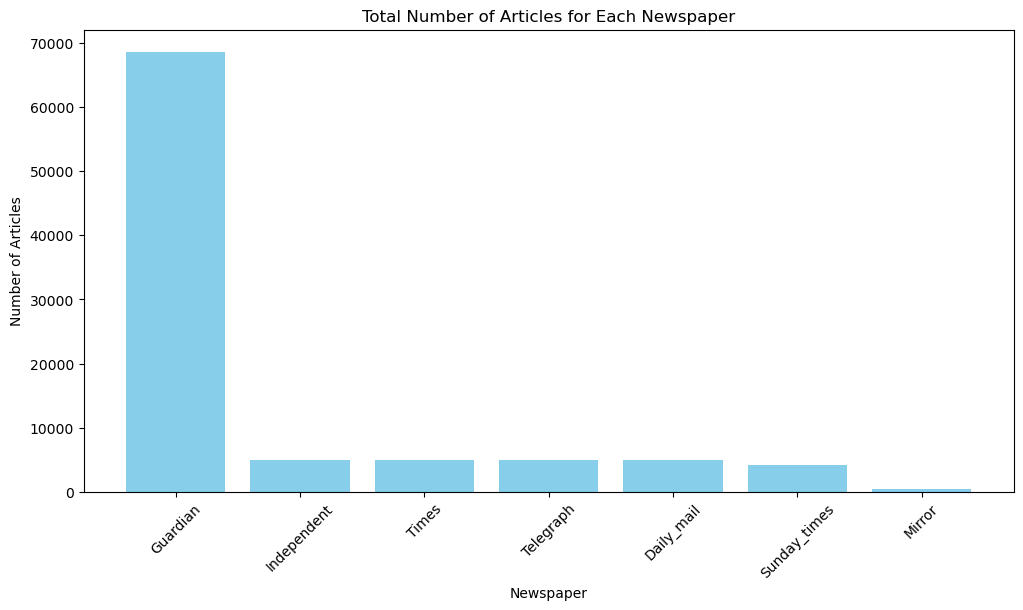

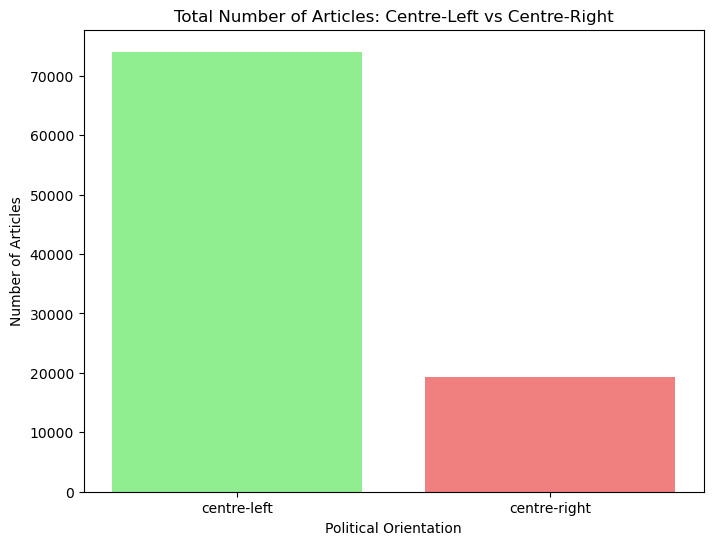

In [2]:
def count_articles_in_folders(parent_folder):
    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times':'centre-right'
    }

    article_counts = {'newspaper': [], 'orientation': [], 'article_count': []}


    for newspaper, orientation in newspapers.items():
        folder_path = os.path.join(parent_folder, newspaper, f"all_{newspaper}")
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            num_articles = len([f for f in os.listdir(folder_path) if f.endswith('.txt')])
            article_counts['newspaper'].append(newspaper.capitalize())
            article_counts['orientation'].append(orientation)
            article_counts['article_count'].append(num_articles)

    return pd.DataFrame(article_counts)

def visualize_article_counts(df):
    plt.figure(figsize=(12, 6))
    df_sorted = df.sort_values(by='article_count', ascending=False)
    plt.bar(df_sorted['newspaper'], df_sorted['article_count'], color='skyblue')
    plt.xlabel('Newspaper')
    plt.ylabel('Number of Articles')
    plt.title('Total Number of Articles for Each Newspaper')
    plt.xticks(rotation=45)
    plt.show()

    orientation_summary = df.groupby('orientation')['article_count'].sum().reset_index()

    plt.figure(figsize=(8, 6))
    plt.bar(orientation_summary['orientation'], orientation_summary['article_count'], color=['lightgreen', 'lightcoral'])
    plt.xlabel('Political Orientation')
    plt.ylabel('Number of Articles')
    plt.title('Total Number of Articles: Centre-Left vs Centre-Right')
    plt.show()

parent_folder = r'/Users/mty925/Documents/Dissertation' 


article_df = count_articles_in_folders(parent_folder)

visualize_article_counts(article_df)


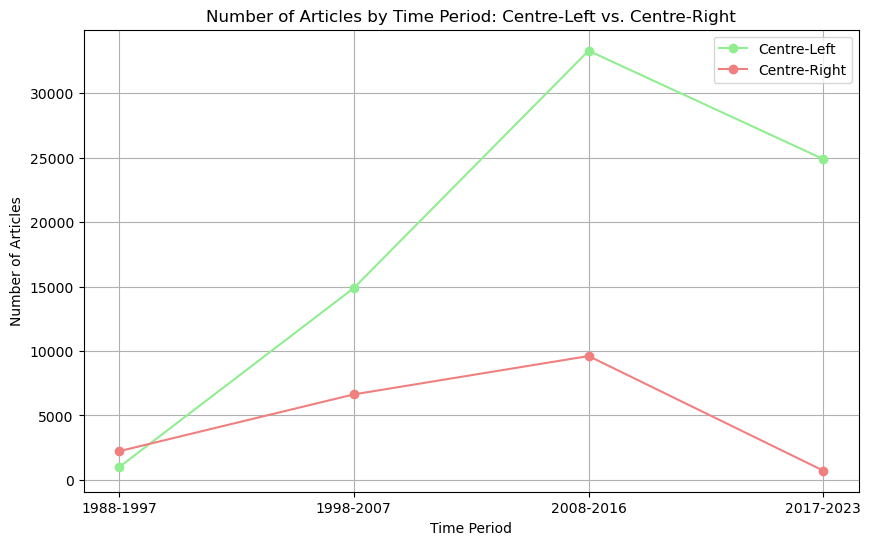

In [3]:
from collections import defaultdict

def get_year_from_filename(filename):
    try:
        return int(filename.split('_')[0].split('-')[0])
    except (IndexError, ValueError):
        return None

def count_articles_by_time_periods(parent_folder):
    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times':'centre-right'
    }


    time_periods = {
        '1988-1997': (1988, 1997),
        '1998-2007': (1998, 2007),
        '2008-2016': (2008, 2016),
        '2017-2023': (2017, 2023)
    }


    article_counts = {
        'centre-left': {period: 0 for period in time_periods},
        'centre-right': {period: 0 for period in time_periods}
    }

    
    for newspaper, orientation in newspapers.items():
        folder_path = os.path.join(parent_folder, newspaper, f"all_{newspaper}")
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith('.txt'):
                    year = get_year_from_filename(filename)
                    if year:
                       
                        for period, (start_year, end_year) in time_periods.items():
                            if start_year <= year <= end_year:
                                article_counts[orientation][period] += 1
                                break

  
    df = pd.DataFrame(article_counts)
    df = df.reset_index().rename(columns={'index': 'Time Period'})
    return df

def plot_article_trends(df):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time Period'], df['centre-left'], marker='o', color='lightgreen', label='Centre-Left')
    plt.plot(df['Time Period'], df['centre-right'], marker='o', color='lightcoral', label='Centre-Right')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Articles')
    plt.title('Number of Articles by Time Period: Centre-Left vs. Centre-Right')
    plt.legend()
    plt.grid(True)
    plt.show()

parent_folder = r'/Users/mty925/Documents/Dissertation'


article_df = count_articles_by_time_periods(parent_folder)


plot_article_trends(article_df)


Due to significant disparity in the dataset for centre left versus centre right articles acorss the period a random sample will be taken of the guardian articles to reduce the overrepresentation from the centre left. In addition the final time period will be eliminated due to the insubstantial number of articles available from the centre right. This is due to the data source being historical news archives which for the only go up to 2019 for one centre right publication.

Post sampling summary statistics 

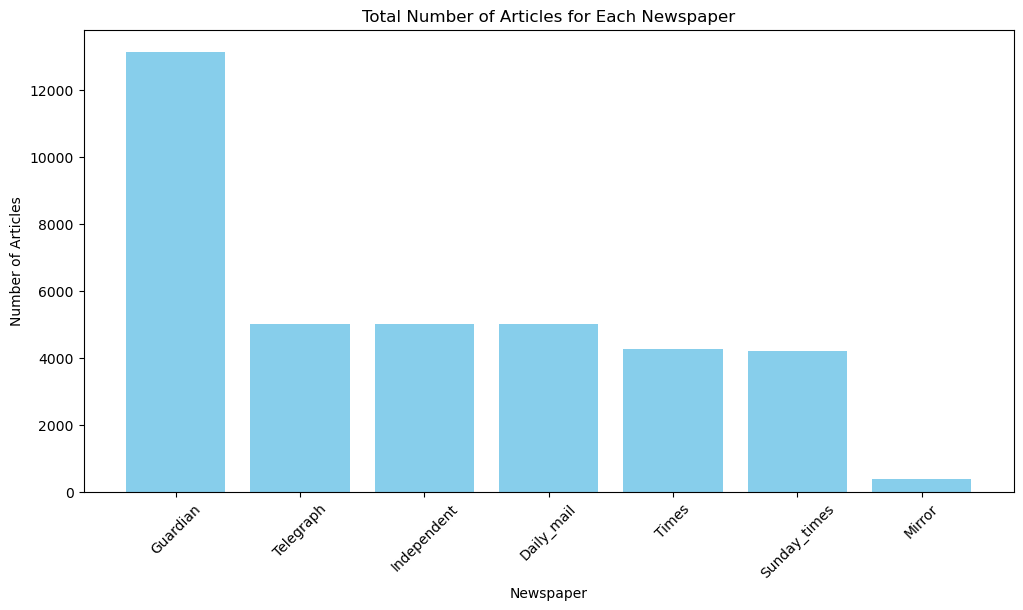

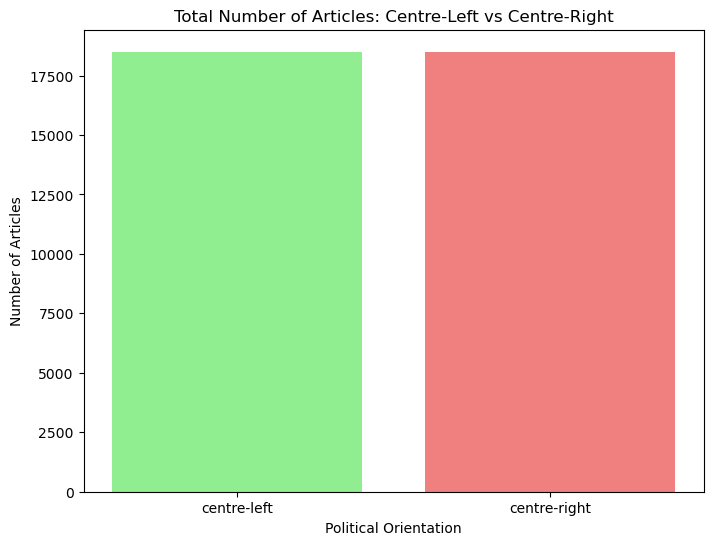

In [28]:
def count_articles_in_folders(parent_folder):

    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times':'centre-right'
    }

    article_counts = {'newspaper': [], 'orientation': [], 'article_count': []}

    
    for newspaper, orientation in newspapers.items():
        folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            
            num_articles = len([f for f in os.listdir(folder_path) if f.endswith('.txt')])
            article_counts['newspaper'].append(newspaper.capitalize())
            article_counts['orientation'].append(orientation)
            article_counts['article_count'].append(num_articles)

    return pd.DataFrame(article_counts)

def visualize_article_counts(df):
    
    plt.figure(figsize=(12, 6))
    df_sorted = df.sort_values(by='article_count', ascending=False)
    plt.bar(df_sorted['newspaper'], df_sorted['article_count'], color='skyblue')
    plt.xlabel('Newspaper')
    plt.ylabel('Number of Articles')
    plt.title('Total Number of Articles for Each Newspaper')
    plt.xticks(rotation=45)
    plt.show()

    
    orientation_summary = df.groupby('orientation')['article_count'].sum().reset_index()

    plt.figure(figsize=(8, 6))
    plt.bar(orientation_summary['orientation'], orientation_summary['article_count'], color=['lightgreen', 'lightcoral'])
    plt.xlabel('Political Orientation')
    plt.ylabel('Number of Articles')
    plt.title('Total Number of Articles: Centre-Left vs Centre-Right')
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation' 


article_df = count_articles_in_folders(parent_folder)

visualize_article_counts(article_df)


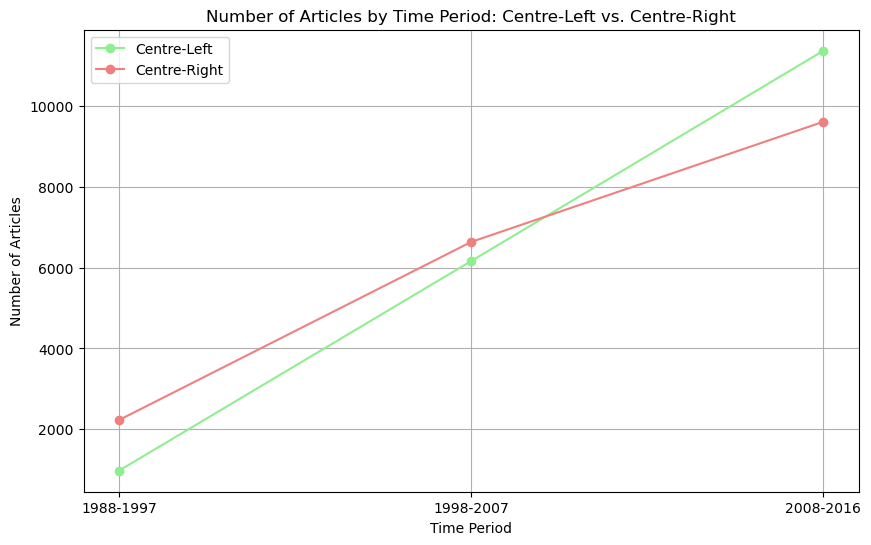

In [4]:
def get_year_from_filename(filename):
    
    try:
        return int(filename.split('_')[0].split('-')[0])
    except (IndexError, ValueError):
        return None

def count_articles_by_time_periods(parent_folder):
    
    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times':'centre-right'
    }

    
    time_periods = {
        '1988-1997': (1988, 1997),
        '1998-2007': (1998, 2007),
        '2008-2016': (2008, 2016),
    }

   
    article_counts = {
        'centre-left': {period: 0 for period in time_periods},
        'centre-right': {period: 0 for period in time_periods}
    }

    
    for newspaper, orientation in newspapers.items():
        folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith('.txt'):
                    year = get_year_from_filename(filename)
                    if year:
                        
                        for period, (start_year, end_year) in time_periods.items():
                            if start_year <= year <= end_year:
                                article_counts[orientation][period] += 1
                                break

    
    df = pd.DataFrame(article_counts)
    df = df.reset_index().rename(columns={'index': 'Time Period'})
    return df

def plot_article_trends(df):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time Period'], df['centre-left'], marker='o', color='lightgreen', label='Centre-Left')
    plt.plot(df['Time Period'], df['centre-right'], marker='o', color='lightcoral', label='Centre-Right')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Articles')
    plt.title('Number of Articles by Time Period: Centre-Left vs. Centre-Right')
    plt.legend()
    plt.grid(True)
    plt.show()



parent_folder = r'/Users/mty925/Documents/Dissertation'


article_df = count_articles_by_time_periods(parent_folder)


plot_article_trends(article_df)


Although there are still some differences in the quantity of centre lef and centre right coverage for each period, the datasets are now broadly comparable

The following code was used to investigate the dataset in closer detail. the length of articles is explored by political orientation and time period. The usage of keywords is also explored. 

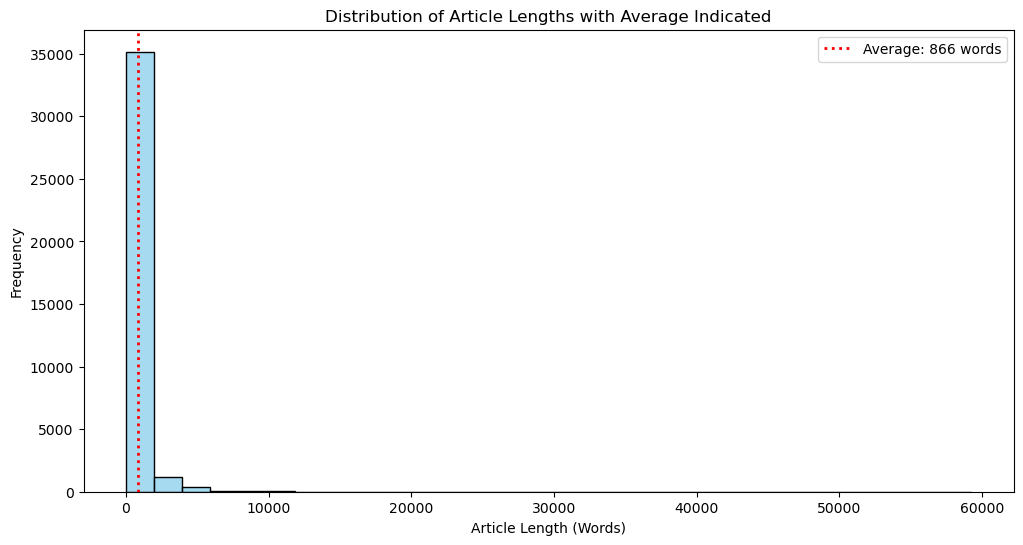

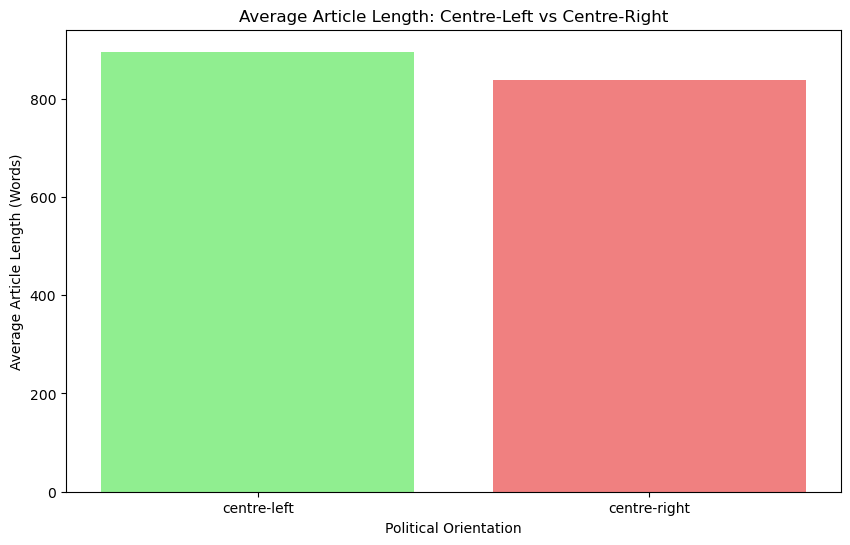

In [26]:
def calculate_article_lengths(parent_folder):
    
    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times': 'centre-right'
    }

    article_lengths = {'length': [], 'newspaper': [], 'orientation': []}

    
    for newspaper, orientation in newspapers.items():
        sampled_folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(sampled_folder_path) and os.path.isdir(sampled_folder_path):
            for filename in os.listdir(sampled_folder_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(sampled_folder_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        word_count = len(content.split()) 
                        article_lengths['length'].append(word_count)
                        article_lengths['newspaper'].append(newspaper.capitalize())
                        article_lengths['orientation'].append(orientation)
    
    return pd.DataFrame(article_lengths)

def visualize_article_length_distribution(article_lengths):
    
    average_length = article_lengths['length'].mean()

    
    plt.figure(figsize=(12, 6))
    sns.histplot(article_lengths['length'], bins=30, kde=False, color='skyblue', edgecolor='black')
    
    
    plt.axvline(average_length, color='red', linestyle='dotted', linewidth=2, label=f'Average: {int(average_length)} words')
    
    plt.xlabel('Article Length (Words)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Article Lengths with Average Indicated')
    plt.legend()
    plt.show()

def visualize_average_article_lengths_by_orientation(article_lengths):
    
    orientation_summary = article_lengths.groupby('orientation')['length'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(orientation_summary['orientation'], orientation_summary['length'], color=['lightgreen', 'lightcoral'])
    plt.xlabel('Political Orientation')
    plt.ylabel('Average Article Length (Words)')
    plt.title('Average Article Length: Centre-Left vs Centre-Right')
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation'


article_lengths_df = calculate_article_lengths(parent_folder)


visualize_article_length_distribution(article_lengths_df)


visualize_average_article_lengths_by_orientation(article_lengths_df)


/var/folders/nr/vnlmxd5s6tz1d1mf250dny6r0000gp/T/ipykernel_39638/638567081.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_period', y='length', data=overall_summary, palette='Blues_d')


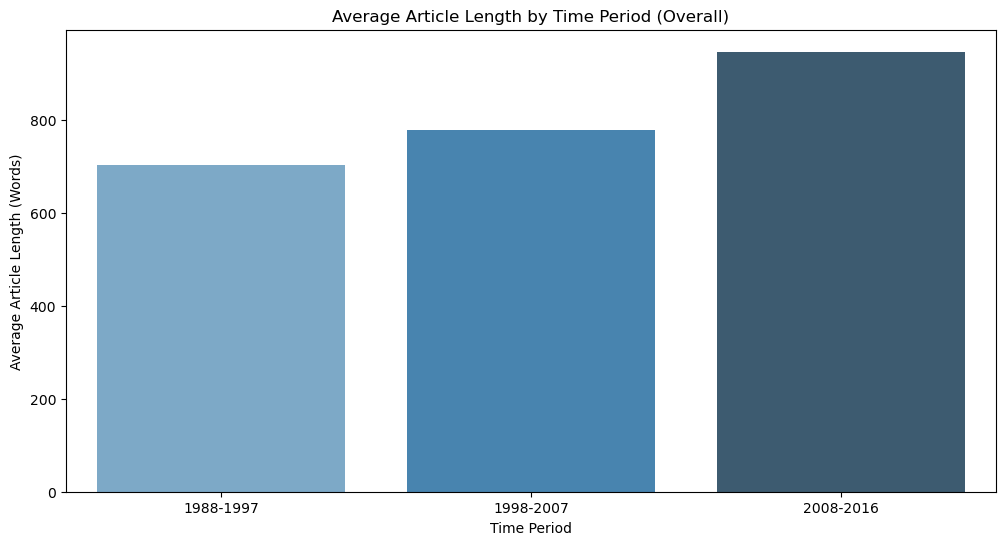

<Figure size 1200x600 with 0 Axes>

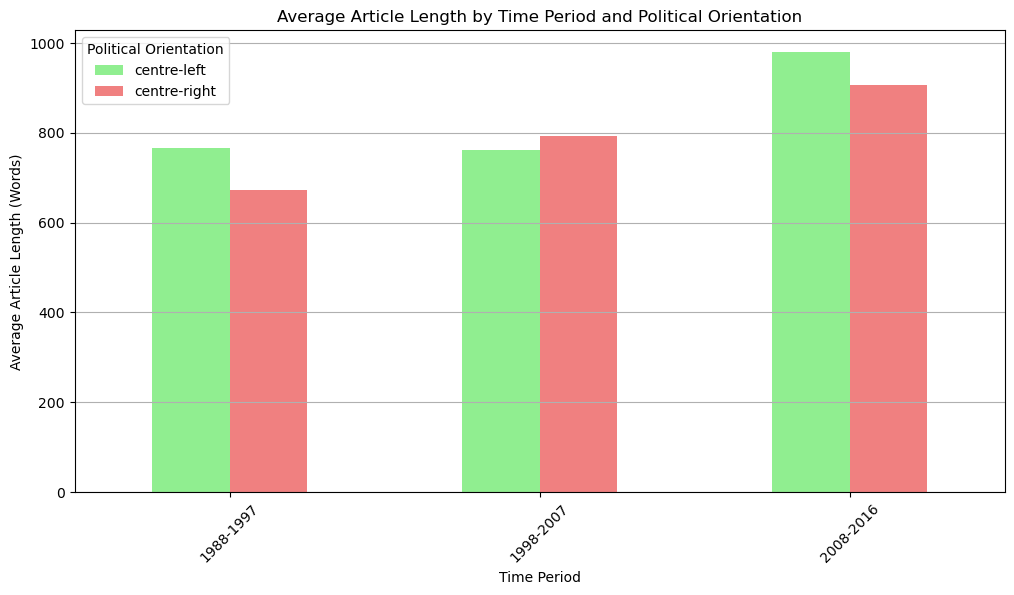

In [5]:
def get_year_from_filename(filename):
    
    try:
        return int(filename.split('_')[0].split('-')[0])
    except (IndexError, ValueError):
        return None

def calculate_article_lengths_by_period(parent_folder):
    
    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times': 'centre-right'
    }

    
    time_periods = {
        '1988-1997': (1988, 1997),
        '1998-2007': (1998, 2007),
        '2008-2016': (2008, 2016),
    }

    article_lengths = {'length': [], 'newspaper': [], 'orientation': [], 'time_period': []}

    
    for newspaper, orientation in newspapers.items():
        sampled_folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(sampled_folder_path) and os.path.isdir(sampled_folder_path):
            for filename in os.listdir(sampled_folder_path):
                if filename.endswith('.txt'):
                    year = get_year_from_filename(filename)
                    if year:
                        
                        for period, (start_year, end_year) in time_periods.items():
                            if start_year <= year <= end_year:
                                file_path = os.path.join(sampled_folder_path, filename)
                                with open(file_path, 'r', encoding='utf-8') as file:
                                    content = file.read()
                                    word_count = len(content.split()) 
                                    article_lengths['length'].append(word_count)
                                    article_lengths['newspaper'].append(newspaper.capitalize())
                                    article_lengths['orientation'].append(orientation)
                                    article_lengths['time_period'].append(period)
                                break
    
    return pd.DataFrame(article_lengths)

def visualize_average_article_lengths_by_period(article_lengths):
    
    overall_summary = article_lengths.groupby('time_period')['length'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='time_period', y='length', data=overall_summary, palette='Blues_d')
    plt.xlabel('Time Period')
    plt.ylabel('Average Article Length (Words)')
    plt.title('Average Article Length by Time Period (Overall)')
    plt.show()

def visualize_average_article_lengths_by_period_and_orientation(article_lengths):
    
    orientation_summary = article_lengths.groupby(['time_period', 'orientation'])['length'].mean().unstack().reset_index()

    plt.figure(figsize=(12, 6))
    orientation_summary.plot(x='time_period', kind='bar', stacked=False, color=['lightgreen', 'lightcoral'], figsize=(12, 6))
    plt.xlabel('Time Period')
    plt.ylabel('Average Article Length (Words)')
    plt.title('Average Article Length by Time Period and Political Orientation')
    plt.xticks(rotation=45)
    plt.legend(title='Political Orientation')
    plt.grid(axis='y')
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation'  

article_lengths_df = calculate_article_lengths_by_period(parent_folder)

visualize_average_article_lengths_by_period(article_lengths_df)
visualize_average_article_lengths_by_period_and_orientation(article_lengths_df)


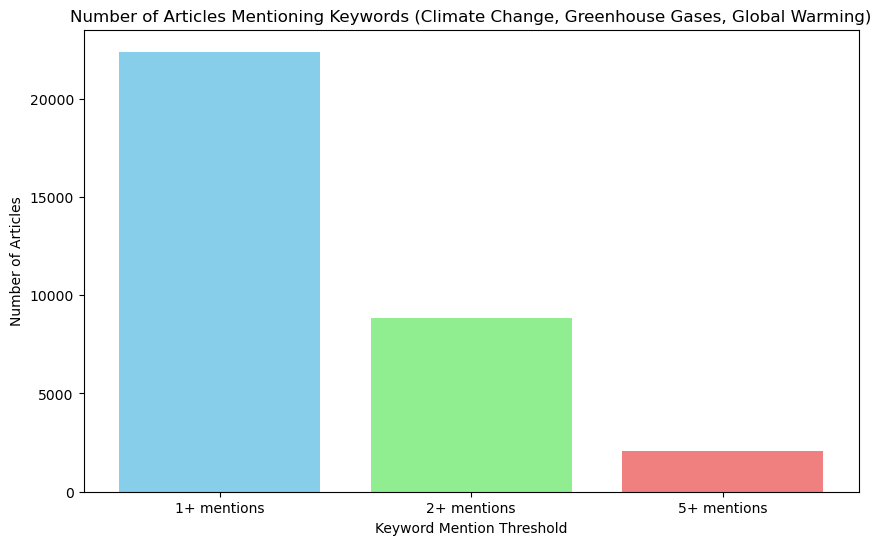

In [24]:

def count_keyword_mentions(article_text, keywords):
    pattern = re.compile(r'\b(?:' + '|'.join(keywords) + r')\b', re.IGNORECASE)
    matches = pattern.findall(article_text)
    return len(matches)

def analyze_keyword_usage(parent_folder):
    newspapers = ['sunday_times', 'independent', 'daily_mail', 'times', 'telegraph']
    keywords = ['climate change', 'greenhouse effect', 'global warming']
    keyword_counts = {'1+ mentions': 0, '2+ mentions': 0, '5+ mentions': 0}

    
    for newspaper in newspapers:
        sampled_folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(sampled_folder_path) and os.path.isdir(sampled_folder_path):
            for filename in os.listdir(sampled_folder_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(sampled_folder_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        
                        mentions = count_keyword_mentions(content, keywords)

                        if mentions >= 1:
                            keyword_counts['1+ mentions'] += 1
                        if mentions >= 2:
                            keyword_counts['2+ mentions'] += 1
                        if mentions >= 5:
                            keyword_counts['5+ mentions'] += 1

    return keyword_counts

def visualize_keyword_usage(keyword_counts):
 
    labels = list(keyword_counts.keys())
    values = list(keyword_counts.values())
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.xlabel('Keyword Mention Threshold')
    plt.ylabel('Number of Articles')
    plt.title('Number of Articles Mentioning Keywords (Climate Change, Greenhouse Gases, Global Warming)')
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation'  


keyword_counts = analyze_keyword_usage(parent_folder)
visualize_keyword_usage(keyword_counts)


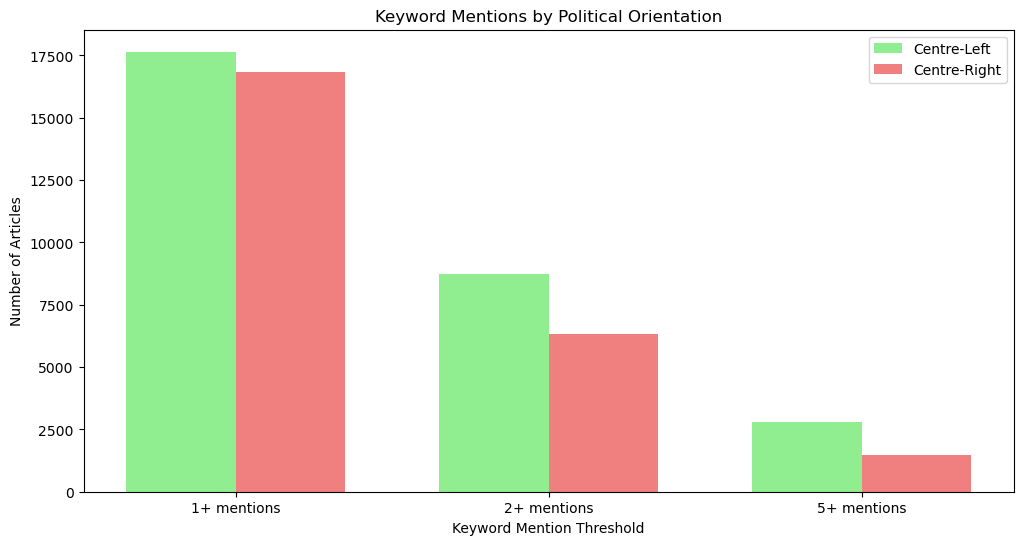

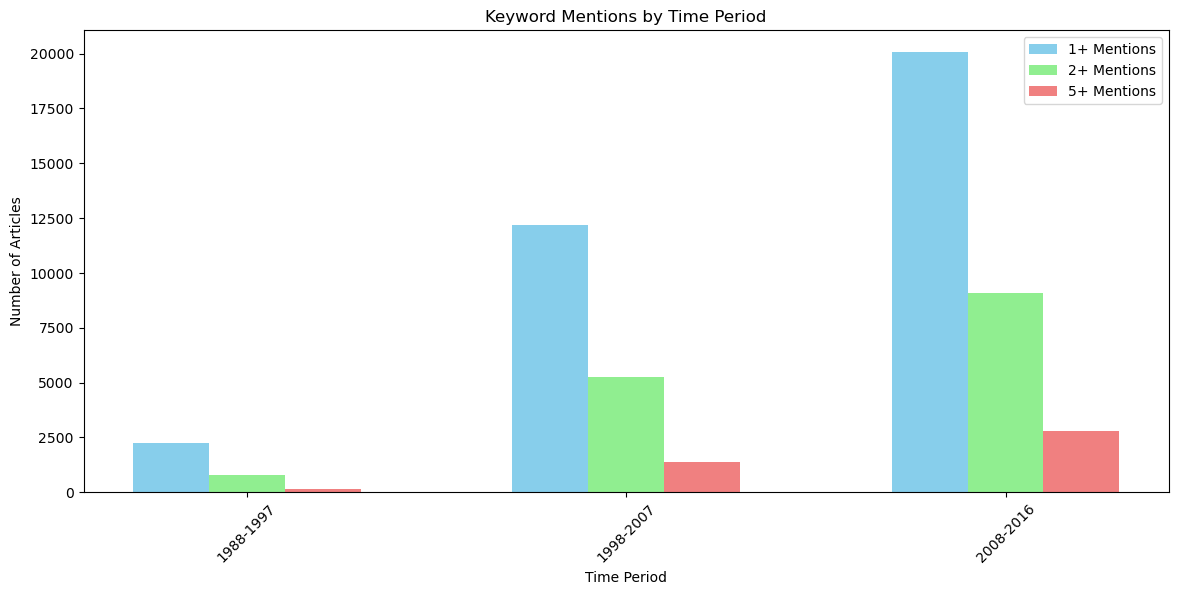

In [23]:
def get_year_from_filename(filename):
    
    try:
        return int(filename.split('_')[0].split('-')[0])
    except (IndexError, ValueError):
        return None

def count_keyword_mentions(article_text, keywords):
    
    pattern = re.compile(r'\b(?:' + '|'.join(keywords) + r')\b')
    matches = pattern.findall(article_text)
    return len(matches)

def analyze_keyword_usage_by_orientation_and_period(parent_folder):
    newspapers = {
        'guardian': 'centre-left',
        'independent': 'centre-left',
        'mirror': 'centre-left',
        'times': 'centre-right',
        'telegraph': 'centre-right',
        'daily_mail': 'centre-right',
        'sunday_times': 'centre-right'
    }

    keywords = ['climate change', 'greenhouse gases', 'global warming']

    time_periods = {
        '1988-1997': (1988, 1997),
        '1998-2007': (1998, 2007),
        '2008-2016': (2008, 2016),
    }

    orientation_counts = {'centre-left': {'1+ mentions': 0, '2+ mentions': 0, '5+ mentions': 0},
                          'centre-right': {'1+ mentions': 0, '2+ mentions': 0, '5+ mentions': 0}}
    period_counts = {period: {'1+ mentions': 0, '2+ mentions': 0, '5+ mentions': 0} for period in time_periods}

    
    for newspaper, orientation in newspapers.items():
        sampled_folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(sampled_folder_path) and os.path.isdir(sampled_folder_path):
            for filename in os.listdir(sampled_folder_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(sampled_folder_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        
                        mentions = count_keyword_mentions(content, keywords)

                    
                        if mentions >= 1:
                            orientation_counts[orientation]['1+ mentions'] += 1
                        if mentions >= 2:
                            orientation_counts[orientation]['2+ mentions'] += 1
                        if mentions >= 5:
                            orientation_counts[orientation]['5+ mentions'] += 1

                        
                        year = get_year_from_filename(filename)
                        if year:
                            for period, (start_year, end_year) in time_periods.items():
                                if start_year <= year <= end_year:
                                    if mentions >= 1:
                                        period_counts[period]['1+ mentions'] += 1
                                    if mentions >= 2:
                                        period_counts[period]['2+ mentions'] += 1
                                    if mentions >= 5:
                                        period_counts[period]['5+ mentions'] += 1
                                    break

    return orientation_counts, period_counts

def visualize_keyword_usage_by_orientation(orientation_counts):
    labels = list(orientation_counts['centre-left'].keys())
    centre_left_values = [orientation_counts['centre-left'][label] for label in labels]
    centre_right_values = [orientation_counts['centre-right'][label] for label in labels]
    x = range(len(labels))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x, centre_left_values, width, color='lightgreen', label='Centre-Left')
    plt.bar([p + width for p in x], centre_right_values, width, color='lightcoral', label='Centre-Right')
    plt.xlabel('Keyword Mention Threshold')
    plt.ylabel('Number of Articles')
    plt.title('Keyword Mentions by Political Orientation')
    plt.xticks([p + width / 2 for p in x], labels)
    plt.legend()
    plt.show()

def visualize_keyword_usage_by_time_period(period_counts):
    
    periods = list(period_counts.keys())
    counts_1 = [period_counts[period]['1+ mentions'] for period in periods]
    counts_2 = [period_counts[period]['2+ mentions'] for period in periods]
    counts_5 = [period_counts[period]['5+ mentions'] for period in periods]
    x = range(len(periods))
    width = 0.2

    plt.figure(figsize=(14, 6))
    plt.bar(x, counts_1, width, color='skyblue', label='1+ Mentions')
    plt.bar([p + width for p in x], counts_2, width, color='lightgreen', label='2+ Mentions')
    plt.bar([p + 2 * width for p in x], counts_5, width, color='lightcoral', label='5+ Mentions')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Articles')
    plt.title('Keyword Mentions by Time Period')
    plt.xticks([p + width for p in x], periods, rotation=45)
    plt.legend()
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation'  


orientation_counts, period_counts = analyze_keyword_usage_by_orientation_and_period(parent_folder)


visualize_keyword_usage_by_orientation(orientation_counts)
visualize_keyword_usage_by_time_period(period_counts)


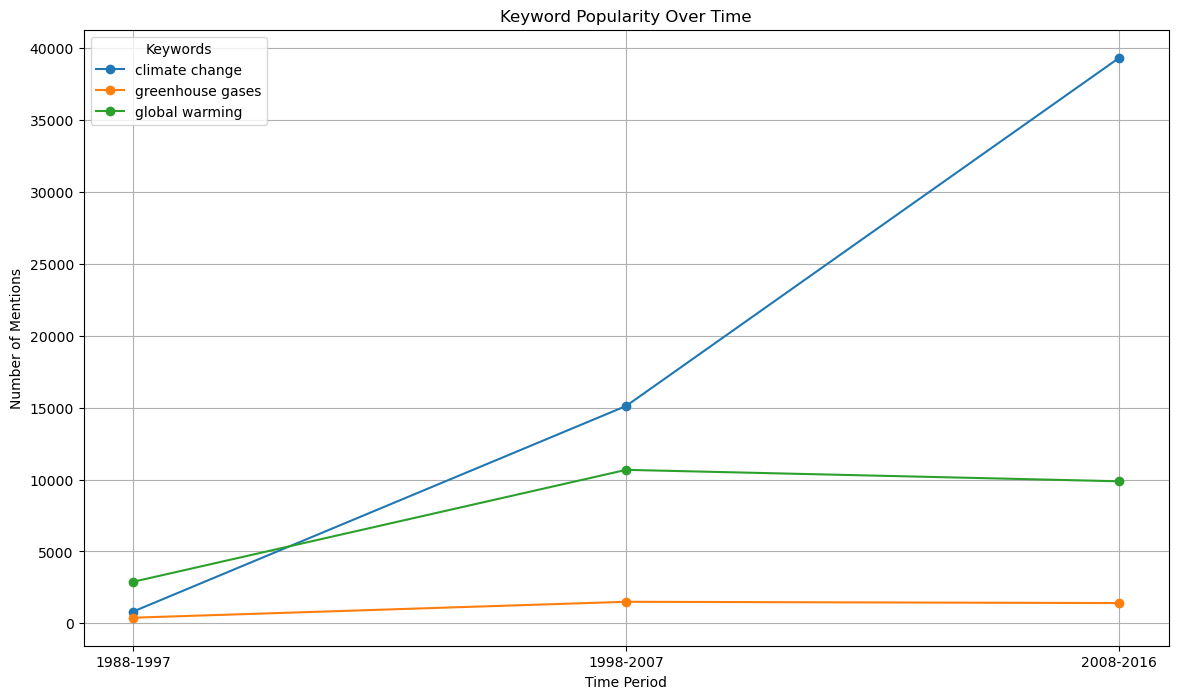

In [22]:
def get_year_from_filename(filename):
    try:
        return int(filename.split('_')[0].split('-')[0])
    except (IndexError, ValueError):
        return None

def count_individual_keyword_mentions(article_text, keywords):
    keyword_counts = {}
    for keyword in keywords:
        keyword_counts[keyword] = len(re.findall(r'\b' + re.escape(keyword) + r'\b', article_text))
    return keyword_counts

def analyze_keyword_popularity_over_time(parent_folder):
    newspapers = ['guardian', 'independent', 'mirror', 'times', 'telegraph', 'daily_mail', 'sunday_times']
    keywords = ['climate change', 'greenhouse gases', 'global warming']
    time_periods = {
        '1988-1997': (1988, 1997),
        '1998-2007': (1998, 2007),
        '2008-2016': (2008, 2016),
    }

   
    keyword_period_counts = {period: {keyword: 0 for keyword in keywords} for period in time_periods}

    
    for newspaper in newspapers:
        sampled_folder_path = os.path.join(parent_folder, newspaper, f"{newspaper}_sampled")
        if os.path.exists(sampled_folder_path) and os.path.isdir(sampled_folder_path):
            for filename in os.listdir(sampled_folder_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(sampled_folder_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        
                        keyword_counts = count_individual_keyword_mentions(content, keywords)

                        year = get_year_from_filename(filename)
                        if year:
                            for period, (start_year, end_year) in time_periods.items():
                                if start_year <= year <= end_year:
                                    for keyword in keywords:
                                        keyword_period_counts[period][keyword] += keyword_counts[keyword]
                                    break

    return keyword_period_counts

def visualize_keyword_popularity_over_time(keyword_period_counts):
   
    periods = list(keyword_period_counts.keys())
    keyword_data = {keyword: [keyword_period_counts[period][keyword] for period in periods] for keyword in keyword_period_counts[periods[0]]}
    plt.figure(figsize=(14, 8))
    for keyword, counts in keyword_data.items():
        plt.plot(periods, counts, marker='o', label=keyword)

    plt.xlabel('Time Period')
    plt.ylabel('Number of Mentions')
    plt.title('Keyword Popularity Over Time')
    plt.legend(title='Keywords')
    plt.grid(True)
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation'


keyword_period_counts = analyze_keyword_popularity_over_time(parent_folder)
visualize_keyword_popularity_over_time(keyword_period_counts)
